<a href="https://colab.research.google.com/github/nadhirasafa/Term-Deposit-Subscription-Prediction-using-Python/blob/main/Nadhira_Safa_Kamiilah_programming_1_ADIIP2025A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Database Preparation and Data Import

In [ ]:
#import library yang digunakan dalam analisis
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#connect google collab ke drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#display isi tables dengan file yang sudah diupload ke drive terlebih dahulu
df = pd.read_excel('/content/drive/MyDrive/Astra/bank train astra.xlsx')
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,100,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,101,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,102,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,103,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,104,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,40095,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,-1,0,unknown,0
39996,40096,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,-1,0,unknown,1
39997,40097,54,admin.,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,-1,0,unknown,1
39998,40098,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,90,7,other,0


In [ ]:
#display isi tables dengan file yang sudah diupload ke drive terlebih dahulu
df_1 = pd.read_excel('/content/drive/MyDrive/Astra/bank test astra.xlsx')
df_1

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40100,57,retired,married,secondary,no,718,no,no,cellular,3,jun,170,1,-1,0,unknown
1,40101,50,management,married,secondary,no,268,no,no,cellular,3,jun,74,2,90,2,failure
2,40102,46,technician,single,secondary,no,4367,yes,no,cellular,3,jun,65,1,96,1,failure
3,40103,56,admin.,married,secondary,no,3554,no,no,cellular,3,jun,151,1,-1,0,unknown
4,40104,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,45306,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
5207,45307,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
5208,45308,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
5209,45309,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [ ]:
#Retrieve data dimensions
df.shape

(40000, 18)

In [ ]:
#Retrieve data dimensions
df_1.shape

(5211, 17)

# Data Cleaning and Exploration

In [ ]:
#display struktur data pada tabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         40000 non-null  int64 
 1   age        40000 non-null  int64 
 2   job        40000 non-null  object
 3   marital    40000 non-null  object
 4   education  40000 non-null  object
 5   default    40000 non-null  object
 6   balance    40000 non-null  int64 
 7   housing    40000 non-null  object
 8   loan       40000 non-null  object
 9   contact    40000 non-null  object
 10  day        40000 non-null  int64 
 11  month      40000 non-null  object
 12  duration   40000 non-null  int64 
 13  campaign   40000 non-null  int64 
 14  pdays      40000 non-null  int64 
 15  previous   40000 non-null  int64 
 16  poutcome   40000 non-null  object
 17  y          40000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 5.5+ MB


In [ ]:
#display struktur data pada tabel
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5211 non-null   int64 
 1   age        5211 non-null   int64 
 2   job        5211 non-null   object
 3   marital    5211 non-null   object
 4   education  5211 non-null   object
 5   default    5211 non-null   object
 6   balance    5211 non-null   int64 
 7   housing    5211 non-null   object
 8   loan       5211 non-null   object
 9   contact    5211 non-null   object
 10  day        5211 non-null   int64 
 11  month      5211 non-null   object
 12  duration   5211 non-null   int64 
 13  campaign   5211 non-null   int64 
 14  pdays      5211 non-null   int64 
 15  previous   5211 non-null   int64 
 16  poutcome   5211 non-null   object
dtypes: int64(8), object(9)
memory usage: 692.2+ KB


In [ ]:
#menghitung jumlah missing value di tiap kolom
df.isna().sum()

,0
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [ ]:
#menghitung jumlah missing value di tiap kolom
df_1.isna().sum()

,0
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [ ]:
# melihat apakah terdapat duplikat di data
print(f"Terdapat {df.duplicated().sum()} baris duplikat di data")

Terdapat 0 baris duplikat di data


In [ ]:
# melihat apakah terdapat duplikat di data
print(f"Terdapat {df_1.duplicated().sum()} baris duplikat di data")

Terdapat 0 baris duplikat di data


In [ ]:
#cek typo dari kolom job
df['job'].value_counts()

,count
job,
blue-collar,9383
management,8166
technician,6852
admin.,4483
services,3910
retired,1437
self-employed,1414
entrepreneur,1405
unemployed,1104


In [ ]:
#cek typo dari kolom marital
df['marital'].value_counts()

,count
marital,
married,24386
single,10889
divorced,4725


In [ ]:
#cek typo dari kolom education
df['education'].value_counts()

,count
education,
secondary,20993
tertiary,11206
primary,6270
unknown,1531


In [ ]:
#melihat rentang variabel untuk cek outlier sekilas
#mencari apakah ada nilai yang tidak masuk akal
print(df[['age', 'balance', 'duration','pdays']].describe())

                age        balance      duration         pdays
count  40000.000000   40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550    254.824300     31.956075
std        9.641776    2903.769716    259.366498     91.061625
min       19.000000   -8019.000000      0.000000     -1.000000
25%       33.000000      54.000000    100.000000     -1.000000
50%       39.000000     407.000000    175.000000     -1.000000
75%       48.000000    1319.000000    313.000000     -1.000000
max       95.000000  102127.000000   4918.000000    385.000000


In [ ]:
#melihat rentang variabel untuk cek outlier sekilas
#mencari apakah ada nilai yang tidak masuk akal
print(df_1[['age', 'balance', 'duration','pdays']].describe())

               age       balance     duration        pdays
count  5211.000000   5211.000000  5211.000000  5211.000000
mean     43.942238   2037.724045   283.791787   103.462099
std      15.954058   3898.173799   241.441834   137.157167
min      18.000000  -1206.000000     1.000000    -1.000000
25%      31.000000    270.500000   134.500000    -1.000000
50%      39.000000    889.000000   220.000000    87.000000
75%      56.000000   2346.500000   355.000000   181.000000
max      95.000000  81204.000000  3785.000000   871.000000


Ada 4 variabel numerik yang memiliki rentang nilai jauh dan jika ada outlier, bisa mengganggu hasil prediksi. Berikut adalah hasil identifikasinya:
> Variabel `age` clear dari outlier karena angka 95 masih masuk akal dan bisa jadi penting untuk menjadi tambahan informasi.

> Variabel `balance` masih masuk akal karena bisa jadi ada customer yang kaya. Namun, perlu dicek lebih lanjut.

> Variabel `duration` ada yang tidak masuk akal.

> Variabel `pdays` ada yang tidak masuk akal.

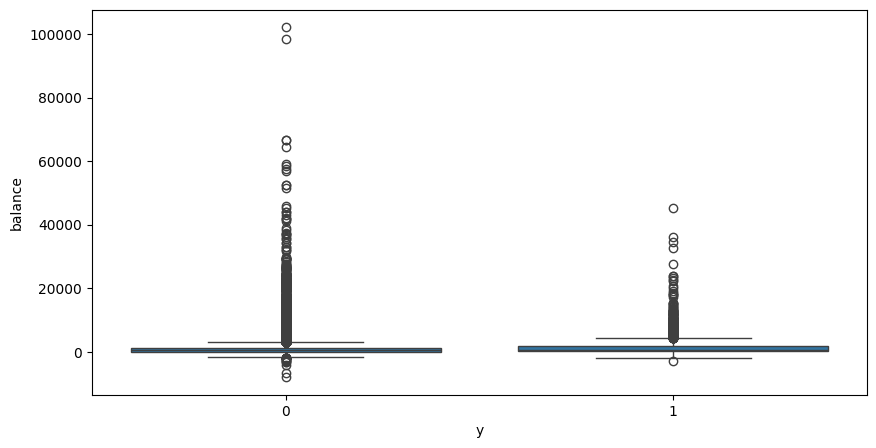

In [ ]:
#cek apakah outlier berpengaruh ke keputusan pelanggan
#jika outlier fokus di "ya" saja atau "tidak" saja, maka mungkin bukan outlier
plt.figure(figsize=(10,5))
sns.boxplot(x=df["y"], y=df["balance"])
plt.show()

Variabel `balance` cleared dari outlier karena outlier hanya fokus di 0 sehingga mungkin memang customer unik.

In [ ]:
#fungsi untuk cek ada tidaknya outlier data
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(df[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(df[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3-Q1

  if batas == 'upper_bound':
      bound = np.where(df[nama_kolom] >= (Q3+1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(df[nama_kolom] <= (Q1-1.5*IQR))
  return list(bound[0])

In [ ]:
#cek outlier kolom pdays dengan perhitungan matematis
#cek outlier di kolom pdays menjadi prioritas karena masih ada yang tidak masuk akal
upper_PD = cek_outlier('pdays','upper_bound')
lower_PD = cek_outlier('pdays','lower_bound')
print(f"Jumlah outlier pada kolom pdays ada sebanyak {len(upper_PD) + len(lower_PD)} data.")

Jumlah outlier pada kolom pdays ada sebanyak 74607 data.


In [ ]:
#cek outlier kolom duration dengan perhitungan matematis
#cek outlier di kolom duration menjadi prioritas karena masih ada yang tidak masuk akal
upper_D = cek_outlier('duration','upper_bound')
lower_D = cek_outlier('duration','lower_bound')
print(f"Jumlah outlier pada kolom duration ada sebanyak {len(upper_D) + len(lower_D)} data.")

Jumlah outlier pada kolom duration ada sebanyak 3000 data.


In [ ]:
#fungsi untuk cek ada tidaknya outlier data
def cek_outlier1(nama_kolom, batas1):
  Q1_test = np.percentile(df_1[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3_test = np.percentile(df_1[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR_test = Q3_test-Q1_test

  if batas1 == 'upper_bound_test':
      bound1 = np.where(df_1[nama_kolom] >= (Q3_test+1.5*IQR_test))
  elif batas1 == 'lower_bound_test':
      bound1 = np.where(df_1[nama_kolom] <= (Q1_test-1.5*IQR_test))
  return list(bound1[0])

In [ ]:
#cek outlier kolom pdays dengan perhitungan matematis
#cek outlier di kolom pdays menjadi prioritas karena masih tidak masuk akal
upper_PD1 = cek_outlier1('pdays','upper_bound_test')
lower_PD1 = cek_outlier1('pdays','lower_bound_test')
print(f"Jumlah outlier pada kolom pdays ada sebanyak {len(upper_PD1) + len(lower_PD1)} data.")

Jumlah outlier pada kolom pdays ada sebanyak 170 data.


In [ ]:
#cek outlier kolom duration dengan perhitungan matematis
#cek outlier di kolom duration menjadi prioritas karena masih tidak masuk akal
upper_D1 = cek_outlier1('duration','upper_bound_test')
lower_D1 = cek_outlier1('duration','lower_bound_test')
print(f"Jumlah outlier pada kolom duration ada sebanyak {len(upper_D1) + len(lower_D1)} data.")

Jumlah outlier pada kolom duration ada sebanyak 311 data.


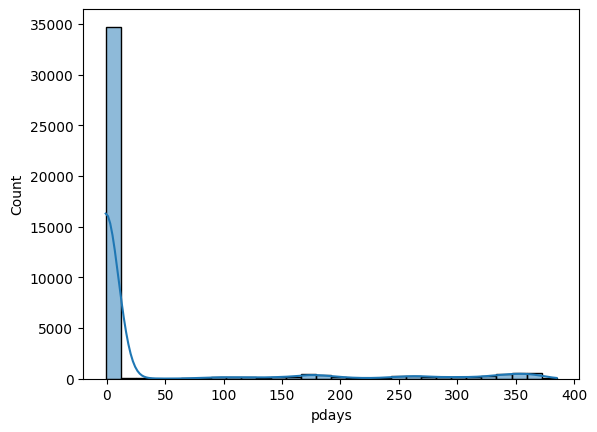

In [ ]:
#cek rentang data
sns.histplot(df['pdays'], bins=30, kde=True)
plt.show()

Variabel `pdays` cleared dari outlier karena outlier tertinggi yaitu 385 dalam konteks pemasaran masih masuk akal dan setelah dicek, customer dengan pdays tersebut masih mau berlangganan, sehingga bisa menjadi informasi penting.

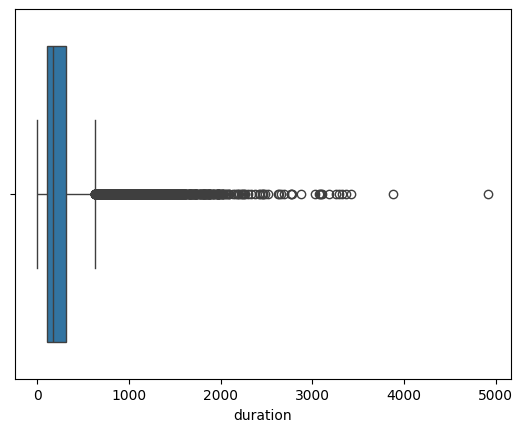

In [ ]:
sns.boxplot(x=df['duration'])
plt.show()

In [ ]:
print(df[df['duration'] > 4000].shape[0])  # Jumlah data di atas 4000 detik

1


> Karena nilai outlier 4918 pada kolom duration sangatlah jauh dari mayoritas data dan setelah dicek customer dengan duration tersebut juga tidak berlangganan, maka nilai tersebut diputuskan untuk dihapus.

> Outlier yang dihapus hanya 4918 karena angka itulah yang sangat jauh dari mayoritas sehinggan kurang relevan. Outlier-outlier diputuskan untuk disimpan karena tidak terlalu signifikan dan bisa menjadi informasi tambahan.

> Outlier hanya akan dihapus pada data train karena pada data test, masing-masing informasi akan jadi sangat penting.

In [ ]:
#menghapus outlier pada kolom duration
df = df.loc[df['duration'] < 4000]

In [ ]:
print(f"Jumlah data di atas 4000 detik: {df[df['pdays'] > 4000].shape[0]}")

In [ ]:
print(f"Jumlah data di atas 4000 detik: {df[df['duration'] > 4000].shape[0]}")
print(f"Dimensi data setelah penghapusan outlier: {df.shape}")
df

Jumlah data di atas 4000 detik: 0
Dimensi data setelah penghapusan outlier: (39998, 18)


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,100,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,101,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,102,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,103,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,104,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,40095,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,-1,0,unknown,0
39996,40096,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,-1,0,unknown,1
39997,40097,54,admin.,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,-1,0,unknown,1
39998,40098,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,90,7,other,0


> Berdasarkan hasil eksplorasi data di atas, dapat disimpulkan bahwa:

> *   Ada **18** variabel pada data Bank Train dan **17**
 variabel pada data Bank Test
> *   **Tidak terdapat duplikat data** di kedua dataframe
> *   Pada kolom `job`, `marital`, dan `education` tidak terdapat typo sehingga bisa diasumsikan seluruh kolom di kedua dataframe **tidak memiliki typo**
> *   **Tidak terdapat missing value** pada seluruh kolom atau variabel di kedua dataframe
> *   Outlier pada kedua dataframe sudah cleared

> Maka, data sudah cleaned dan proses analisis bisa dilanjutkan ke **Preprocessing Data**.

# Preprocessing Data Process

In [ ]:
#encode text column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding
df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['education'] = label_encoder.fit_transform(df['education'])
df['default'] = label_encoder.fit_transform(df['default'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['month'] = label_encoder.fit_transform(df['month'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,100,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,101,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,102,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,103,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,104,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,40095,53,9,1,2,0,395,0,0,0,3,6,107,1,-1,0,3,0
39996,40096,30,4,2,2,0,3340,0,0,0,3,6,238,3,-1,0,3,1
39997,40097,54,0,0,1,0,200,0,0,0,3,6,170,1,-1,0,3,1
39998,40098,34,4,1,2,0,1047,0,0,0,3,6,342,1,90,7,1,0


In [ ]:
#encode text column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding
df_1['job'] = label_encoder.fit_transform(df_1['job'])
df_1['marital'] = label_encoder.fit_transform(df_1['marital'])
df_1['education'] = label_encoder.fit_transform(df_1['education'])
df_1['default'] = label_encoder.fit_transform(df_1['default'])
df_1['housing'] = label_encoder.fit_transform(df_1['housing'])
df_1['loan'] = label_encoder.fit_transform(df_1['loan'])
df_1['contact'] = label_encoder.fit_transform(df_1['contact'])
df_1['month'] = label_encoder.fit_transform(df_1['month'])
df_1['poutcome'] = label_encoder.fit_transform(df_1['poutcome'])
df_1

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40100,57,5,1,1,0,718,0,0,0,3,6,170,1,-1,0,3
1,40101,50,4,1,1,0,268,0,0,0,3,6,74,2,90,2,0
2,40102,46,9,2,1,0,4367,1,0,0,3,6,65,1,96,1,0
3,40103,56,0,1,1,0,3554,0,0,0,3,6,151,1,-1,0,3
4,40104,32,7,2,2,0,785,0,0,0,3,6,273,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,45306,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
5207,45307,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
5208,45308,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
5209,45309,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


<Axes: xlabel='y', ylabel='count'>

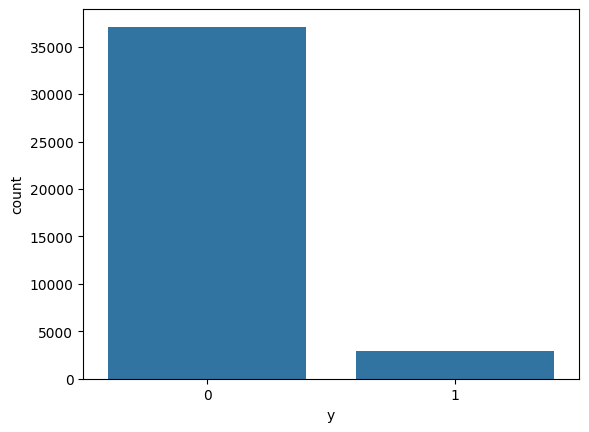

In [ ]:
#cek keseimbangan data
sns.countplot(x=df['y'])

In [ ]:
#memastikan adanya ketidakseimbangan data
df["y"].value_counts()

,count
y,
0,37103
1,2896


> Karena datanya mengalami imbalanced, maka akan dicoba teknik undersampling dan oversampling (SMOTE) sebagai perbandingan. Lalu, akan dicek menggunakan F1 Score untuk memilih teknik terbaik.

In [ ]:
#TEKNIK UNDERSAMPLING
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter

X = df.drop('y', axis=1)  # Menghapus kolom target 'y' untuk mendapatkan variabel prediktor
y = df['y']  # Kolom 'y' adalah target yang ingin diprediksi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)

print(f"Resampled dataset shape: {Counter(y_res)}")

Resampled dataset shape: Counter({0: 2271, 1: 2271})


In [ ]:
#MENGHITUNG F1 SCORE DENGAN MODEL RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model on the undersampled data (X_res, y_res)
model.fit(X_res, y_res)

# Predict on the test set (X_test)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
f1_per_class = f1_score(y_test, y_pred, average=None)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score untuk kelas 0: {f1_per_class[0]:.4f}')
print(f'F1-score untuk kelas 1: {f1_per_class[1]:.4f}')

print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8741
Precision: 0.3732
Recall: 0.8992
F1-score untuk kelas 0: 0.9274
F1-score untuk kelas 1: 0.5275
F1 Score: 0.5275


> Karena hasil dari teknik undersampling kurang baik, maka dicoba teknik lain, yaitu oversampling (SMOTE).

In [ ]:
#TEKNIK OVERSAMPLING
from imblearn.over_sampling import SMOTE

X = df[['id','age', 'job', 'marital', 'education', 'default',
           'balance', 'housing', 'loan', 'contact', 'day', 'month',
           'duration', 'campaign', 'pdays', 'previous',
           'poutcome']] # Menghapus kolom target 'y' untuk mendapatkan variabel prediktor
y = df['y']  # Kolom 'y' adalah target yang ingin diprediksi

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print(f"Resampled dataset shape: {Counter(y_res)}")

Resampled dataset shape: Counter({0: 29728, 1: 29728})


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Pisahkan fitur dan target
X = df.drop(columns=['y'])  # Hapus kolom target 'y'
y = df['y']  # Kolom target

# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lakukan SMOTE pada training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Cek jumlah sampel setelah SMOTE
print(f"Resampled dataset shape: {Counter(y_train_resampled)}")

# Pastikan X_test dan y_test tidak diubah
print(f"Original test dataset shape: {Counter(y_test)}")

Resampled dataset shape: Counter({0: 29728, 1: 29728})
Original test dataset shape: Counter({0: 7375, 1: 625})


In [ ]:
#MENGHITUNG F1 SCORE DENGAN MODEL RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model on the undersampled data (X_res, y_res)
model.fit(X_res, y_res)

# Predict on the test set (X_test)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
f1_per_class = f1_score(y_test, y_pred, average=None)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score untuk kelas 0: {f1_per_class[0]:.4f}')
print(f'F1-score untuk kelas 1: {f1_per_class[1]:.4f}')

print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9227
Precision: 0.5043
Recall: 0.6560
F1-score untuk kelas 0: 0.9576
F1-score untuk kelas 1: 0.5702
F1 Score: 0.5702


> Dari hasil perbandingan di atas, dapat diketahui bahwa teknik SMOTE lebih baik dibandingkan teknik undersampling.

> Maka, analisis selanjutnya akan diteruskan menggunakan teknik SMOTE.

> Dikarenakan hasil Random Forest yang masih kurang baik, maka akan dicoba perbandingan menggunakan classifier lainnya.

# Modeling & Evaluation

In [ ]:
#PREDICTION USING DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Train Model
model.fit(X_train, y_train)

# Prediksi hasil
y_pred = model.predict(X_test)

# Evaluasi model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f'F1 Score: {f1:.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.919
F1 Score: 0.5275
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7375
           1       0.48      0.42      0.45       625

    accuracy                           0.92      8000
   macro avg       0.72      0.69      0.70      8000
weighted avg       0.91      0.92      0.92      8000



In [ ]:
#PREDICTION USING NAIVE BAYES CLASSIFIER
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
model = GaussianNB()

# Train Model
model.fit(X_train, y_train)

# Prediksi hasil
y_pred = model.predict(X_test)

# Evaluasi model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f'F1 Score: {f1:.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.930125
F1 Score: 0.5275
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7375
           1       0.57      0.41      0.48       625

    accuracy                           0.93      8000
   macro avg       0.76      0.69      0.72      8000
weighted avg       0.92      0.93      0.92      8000



In [ ]:
#PREDICTION USING XGBoost CLASSIFIER
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Inisialisasi model XGBoost
model = XGBClassifier(random_state=42)

# Train Model
model.fit(X_train, y_train)

# Prediksi hasil
y_pred = model.predict(X_test)

# Evaluasi model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f'F1 Score: {f1:.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.93275
F1 Score: 0.5275
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7375
           1       0.61      0.39      0.48       625

    accuracy                           0.93      8000
   macro avg       0.78      0.69      0.72      8000
weighted avg       0.92      0.93      0.93      8000



In [ ]:
#PREDICTION USING LogReg CLASSIFIER
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'balance', 'duration']] = scaler.fit_transform(df[['age', 'balance', 'duration']])

# Inisialisasi model Logistic Regression
model = LogisticRegression(random_state=42)

# Train Model
model.fit(X_train, y_train)

# Prediksi hasil
y_pred = model.predict(X_test)

# Evaluasi model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f'F1 Score: {f1:.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.928125
F1 Score: 0.5702
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7375
           1       0.62      0.21      0.31       625

    accuracy                           0.93      8000
   macro avg       0.78      0.60      0.64      8000
weighted avg       0.91      0.93      0.91      8000



> Dari hasil perbandingan di atas, dapat diketahui bahwa classifier terbaik adalah Random Forest dan Logistic Regression.

> Oleh karena itu, 2 metode tersebut yang akan digunakan pada data testingnya.

# Data Test Prediction

In [ ]:
# Pastikan hanya pakai fitur (tanpa id)
X_test = df_1

# Prediksi
y_pred = model.predict(X_test)

# Simpan hasil prediksi ke CSV untuk submit ke Kaggle
result = pd.DataFrame({'id': df_1['id'], 'y_pred': y_pred})
result.to_csv('predictions.csv', index=False)
print("Predictions saved!")

Predictions saved!


In [ ]:
from google.colab import files
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>